<a href="https://colab.research.google.com/github/Imran-Github22/Programming-For-Data/blob/main/Projects/15_2_Decision_Tree_coded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a simple decision tree
---

In this worksheet we are going to work with a data set, using the idea of a decision tree class.  We are going to simplify the model and use Python code to make a simple decision tree classification model.  We will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

In this worksheet we are going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the mean for each of the 4 size columns
*  calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, mean, median and upper and lower quartile values in each of the columns


In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

# Columns for the encoding
dimension_columns = column_names[:-1]

def load_data_frame(url, columns):
  df = pd.read_csv(url, names=column_names)
  return df

iris_data = load_data_frame(url, column_names)

In [2]:
# The funcion displays information of the raw data-set and the calculated median
def show_info(df):
  # Task 1 - Show Column info (how many columns, what type of data, any missing data?)
  display(df.info())
  print('')

  # Task 2 - The first 10 and the last 10 records to show the type of values included
  display(df.head(10))
  print('')
  display(df.tail(10))
  print('')

  #Task 3 - Find out how many unique values there are in the species column
  unique_val_species = df['species'].unique()
  print(f'Unique Species = {len(unique_val_species)}, {unique_val_species}')
  print('')

  #Task 4 - Calculate and show stats
  describe_df = df.describe()

  median_dict = dict(df[['sepal-length', 'sepal-width', 'petal-length'\
                                    , 'petal-width']].median(), index=['median'])
  stats_df = pd.DataFrame.from_records(median_dict, index=['median'])
  stats_df.drop(columns=['index'], inplace=True)
  stats_df = pd.concat([describe_df, stats_df])
  return stats_df

show_info(iris_data) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica



Unique Species = 3, ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']



,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
median,5.800000,3.000000,4.350000,1.300000


### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [3]:
# import the train_test_split function
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size=0.33)

# The function displays a menu to make a selection for the indicator
def show_menu():
  option_dict = {0:'Mean', 1:'Median', 2:'Upper-Quartile', 3: 'Lower-Quartile'}
  print('Menu Options:')
  for k, v in option_dict.items():
    if k==0:
      print(f"{k} = {v} (default)")
    else:
      print(f"{k} = {v}")
  selected_option = input(f"\nPlease input an option? ")
  if selected_option.isdigit():
    selected_option = int(selected_option)
  else:
    selected_option = 0
  if selected_option not in [0, 1, 2, 3]:
    selected_option = 0
  # Create a tuple of the opted selection
  selected_indicator = (selected_option, option_dict[selected_option])
  print(f"\nThe indicator measure selected: {selected_indicator}\n")
  return selected_indicator

selected_indicator = show_menu()

Menu Options:
0 = Mean (default)
1 = Median
2 = Upper-Quartile
3 = Lower-Quartile

Please input an option? 

The indicator measure selected: (0, 'Mean')



### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.  For now, the indicator is the mean.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [4]:
# Drop any null values from each column
train.dropna(inplace=True)

# Calculate the indicator as per the option selected
def show_stats_df(df, columns, indicator):
  selected_option, indicator_txt = indicator
  describe_df = df.describe()
  indicator_dict = {}
  if selected_option == 0:         # mean  
    for column in columns:
       indicator_dict[column] = df[column].mean()
  elif selected_option == 1:       # median
    for column in columns:
       indicator_dict[column] = df[column].median()
  elif selected_option == 2:       # upper-quartile
    for column in columns:
       indicator_dict[column] = df[column].quantile(0.75)
  elif selected_option == 3:       # lower-quartile
    for column in columns:
       indicator_dict[column] = df[column].quantile(0.25)
  stats_df = pd.DataFrame.from_records(indicator_dict, index=[indicator_txt.lower()])
  stats_df = pd.concat([describe_df, stats_df])
  return indicator_dict, stats_df

# Show the summary statistics including the calculated values
print('The summary statistics including the calculated Indicator:\n')
indicator_dict, stats_df = show_stats_df(train, dimension_columns, selected_indicator)
display(stats_df)

The summary statistics including the calculated Indicator:



,sepal-length,sepal-width,petal-length,petal-width
count,100.000000,100.000000,100.000000,100.000000
mean,5.819000,3.035000,3.745000,1.194000
std,0.858434,0.404114,1.773678,0.764994
min,4.300000,2.000000,1.000000,0.100000
25%,5.075000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.025000,1.800000
max,7.900000,4.100000,6.900000,2.500000
mean,5.819000,3.035000,3.745000,1.194000


In [5]:
# get the mean for each column and apply a function to encode
# into 1 (above mean) and 0 (mean or below mean)
# 'encode' function requires a dataframe, column name & the encoding 'indicator'
def encode(df, **kwds):
  key = kwds['key']
  indicator = kwds['indicator']
  if df[key] >= indicator:
    return 1
  else:
    return 0
  return

# run the function for each column so that each of the four columns are encoded,
# then drop the original columns, saving as a new dataframe
def get_encoded_df(df, columns, indicator):
  selected_option, indicator_txt = indicator
  if selected_option == 0:             # 'mean'
    for column in columns:
      df[column] = \
      df.apply(encode, axis=1, key=column, indicator=df[column].mean())
  elif selected_option == 1:           # 'median'
    for column in columns:
      df[column] = \
      df.apply(encode, axis=1, key=column, indicator=df[column].median())
  elif selected_option == 2:           # 'upper-quartile'
    for column in columns:
      df[column] = \
      df.apply(encode, axis=1, key=column, indicator=df[column].quantile(0.75))
  elif selected_option == 3:           # 'lower-quartile':
    for column in columns:
      df[column] = \
      df.apply(encode, axis=1, key=column, indicator=df[column].quantile(0.25))
  else:
      print('Sorry, yet to programme it :) ')  
  return df

# Encode the DataFrame with respect to the selected indicator
train = get_encoded_df(train, dimension_columns, selected_indicator)

# Show the summary statistics post-encoding
print('The summary statistics post-encoding:\n')
idicator_enc_dict, encoded_stats_df = show_stats_df(train, dimension_columns, selected_indicator)
display(encoded_stats_df)

The summary statistics post-encoding:



,sepal-length,sepal-width,petal-length,petal-width
count,100.00,100.000000,100.000000,100.000000
mean,0.45,0.460000,0.610000,0.600000
std,0.50,0.500908,0.490207,0.492366
min,0.00,0.000000,0.000000,0.000000
25%,0.00,0.000000,0.000000,0.000000
50%,0.00,0.000000,1.000000,1.000000
75%,1.00,1.000000,1.000000,1.000000
max,1.00,1.000000,1.000000,1.000000
mean,0.45,0.460000,0.610000,0.600000


### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the mean that are NOT Iris-virginica.  Calculate these in the same way



In [6]:
# Function describes the data-set in counts and in proportion of the species
def describe(df, species_names_column, dimension_columns, show_proportions=False):
  above_indicator_sums_df = df.groupby([species_names_column])[dimension_columns].sum()
  total_sum = above_indicator_sums_df.sum()
  if show_proportions:
    prop_dict = {}
    for column in dimension_columns:
      prop_dict[column] = above_indicator_sums_df[column] / total_sum[column]
    describe_dict = prop_dict
    describe_df = pd.DataFrame.from_dict(prop_dict)
  else:
    describe_dict = above_indicator_sums_df.to_dict()
    totals_df = pd.DataFrame.from_records([total_sum], index=['>= Indicator Total:'])
    describe_df = pd.concat([above_indicator_sums_df, totals_df])
  return describe_dict, describe_df

print('Species Count (equal and above the indicator):')
describe_dict, describe_df = describe(train, 'species', dimension_columns)
display(describe_df)
print('\nSpecies Proportions (equal and above the indicator):')
desecribe_prop_dict, describe_prop_df = describe(train, 'species', dimension_columns, True)
display(describe_prop_df)

Species Count (equal and above the indicator):


,sepal-length,sepal-width,petal-length,petal-width
Iris-setosa,0,29,0,0
Iris-versicolor,18,5,28,27
Iris-virginica,27,12,33,33
>= Indicator Total:,45,46,61,60



Species Proportions (equal and above the indicator):


,sepal-length,sepal-width,petal-length,petal-width
species,,,,
Iris-setosa,0.0,0.630435,0.000000,0.00
Iris-versicolor,0.4,0.108696,0.459016,0.45
Iris-virginica,0.6,0.260870,0.540984,0.55


In [7]:
# Function to calculate the proportions
def get_proportion(df, columns, species, indicator, calculate_on = 'both'):
  selected_option, indicator_txt = indicator
  i = 0
  species_list_of_props_dict = []
  while i <= 1:  
    if calculate_on == 'eq_gt': # equal and above the indicator
      Flag = 1                  # select only the ones encoded with 1
      i = 2
      index_str = f'{species} >= {indicator_txt}:'
    elif calculate_on == 'lt':  # below the indicator
      Flag = 0                  # select only the ones encoded with 0
      i = 2
      index_str = f'{species} < {indicator_txt}:'
    else:                       # calculate both equal-above and below the indicator
      i+=1
      if i == 1:
        Flag = 1                # select only the ones encoded with 1
        index_str = f'{species} >= {indicator_txt}:'
      else:
        Flag = 0                # select only the ones encoded with 0
        index_str = f'{species} < {indicator_txt}:'        
    
    # Species only DataFrame
    species_df = df[df['species']==species]

    # dictionary with counts of 1/0 of the indicator for the specific 'species'
    species_flag_dict = {}
    species_flag_dict['species'] = index_str
    for column in columns:
      species_flag_dict[column] = len(species_df[species_df[column] == Flag])
    
    # Get proportions
    species_prop_dict = {}
    species_prop_dict['species'] = species              #'p'
    for column in columns:
      total_count = len(df[df[column] == Flag])
      if total_count == 0:
        print(species_flag_dict[column])
        species_prop_dict[column] = species_flag_dict[column]
      else:
        species_prop_dict[column] = species_flag_dict[column]/total_count

    # Get 1 - proportions
    species_except_dict = {}
    species_except_dict['species'] = f'Other than {species}'   #'1 - p'
    for column in columns:
      species_except_dict[column] = 1 - species_prop_dict[column]    
    species_list_of_props_dict.append({Flag: [species_prop_dict, species_except_dict]})
    if Flag == 1:
      species_flag_gt_df = pd.DataFrame.from_dict([species_flag_dict, species_prop_dict,\
                                            species_except_dict])
      species_prop_df = species_flag_gt_df
    else:
      species_flag_lt_df = pd.DataFrame.from_dict([species_flag_dict, species_prop_dict,\
                                            species_except_dict])
      species_prop_df = species_flag_lt_df
    if calculate_on == 'both' and i == 2: # only if end of loop and 'both' was selected.
      species_prop_df = pd.concat([species_flag_gt_df, species_flag_lt_df])
  return species_list_of_props_dict, species_prop_df

In [8]:
# Function to build a summary of the proportions of all the species above/equal and below indicator
def get_species_dashboard(dfs):
  species_prop_df = pd.concat(dfs)
  return species_prop_df

In [9]:
# calculate the proportion of results where the value is on or above mean 
# that are of the species Iris-virginica
iris_virginica_eq_gt_dict, iris_virginica_eq_gt_df = get_proportion(train, dimension_columns, 'Iris-virginica', selected_indicator, 'eq_gt')

display(iris_virginica_eq_gt_df.style.hide_index())
display(iris_virginica_eq_gt_dict)

species,sepal-length,sepal-width,petal-length,petal-width
Iris-virginica >= Mean:,27.000000,12.000000,33.000000,33.000000
Iris-virginica,0.600000,0.260870,0.540984,0.550000
Other than Iris-virginica,0.400000,0.739130,0.459016,0.450000


[{1: [{'petal-length': 0.5409836065573771,
    'petal-width': 0.55,
    'sepal-length': 0.6,
    'sepal-width': 0.2608695652173913,
    'species': 'Iris-virginica'},
   {'petal-length': 0.4590163934426229,
    'petal-width': 0.44999999999999996,
    'sepal-length': 0.4,
    'sepal-width': 0.7391304347826086,
    'species': 'Other than Iris-virginica'}]}]

### Exercise 5 - Calculate the proportion of each column, where the value is below mean, that are of species 
##Iris-virginica

Repeat the code above, this time looking for values below the mean

In [10]:
# calculate the proportion of results where the value is below mean that are 
# of the species Iris-virginica
iris_virginica_but_lt_dict, iris_virginica_lt_df = get_proportion(train, dimension_columns, 'Iris-virginica', selected_indicator, 'lt')

display(iris_virginica_lt_df.style.hide_index())
display(iris_virginica_but_lt_dict)

species,sepal-length,sepal-width,petal-length,petal-width
Iris-virginica < Mean:,6.000000,21.000000,0.000000,0.000000
Iris-virginica,0.109091,0.388889,0.000000,0.000000
Other than Iris-virginica,0.890909,0.611111,1.000000,1.000000


[{0: [{'petal-length': 0.0,
    'petal-width': 0.0,
    'sepal-length': 0.10909090909090909,
    'sepal-width': 0.3888888888888889,
    'species': 'Iris-virginica'},
   {'petal-length': 1.0,
    'petal-width': 1.0,
    'sepal-length': 0.8909090909090909,
    'sepal-width': 0.6111111111111112,
    'species': 'Other than Iris-virginica'}]}]

In [11]:
# Summary of proportions - Dashboard
iris_virginica_prop_list_of_dict, iris_virginica_prop_df = get_proportion(train, dimension_columns, 'Iris-virginica', selected_indicator)
display(iris_virginica_prop_df.style.hide_index())
display(iris_virginica_prop_list_of_dict)

species,sepal-length,sepal-width,petal-length,petal-width
Iris-virginica >= Mean:,27.000000,12.000000,33.000000,33.000000
Iris-virginica,0.600000,0.260870,0.540984,0.550000
Other than Iris-virginica,0.400000,0.739130,0.459016,0.450000
Iris-virginica < Mean:,6.000000,21.000000,0.000000,0.000000
Iris-virginica,0.109091,0.388889,0.000000,0.000000
Other than Iris-virginica,0.890909,0.611111,1.000000,1.000000


[{1: [{'petal-length': 0.5409836065573771,
    'petal-width': 0.55,
    'sepal-length': 0.6,
    'sepal-width': 0.2608695652173913,
    'species': 'Iris-virginica'},
   {'petal-length': 0.4590163934426229,
    'petal-width': 0.44999999999999996,
    'sepal-length': 0.4,
    'sepal-width': 0.7391304347826086,
    'species': 'Other than Iris-virginica'}]},
 {0: [{'petal-length': 0.0,
    'petal-width': 0.0,
    'sepal-length': 0.10909090909090909,
    'sepal-width': 0.3888888888888889,
    'species': 'Iris-virginica'},
   {'petal-length': 1.0,
    'petal-width': 1.0,
    'sepal-length': 0.8909090909090909,
    'sepal-width': 0.6111111111111112,
    'species': 'Other than Iris-virginica'}]}]

### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






##Iris-versicolor:

In [12]:
# calculate the proportion of results where the value is on or above mean that are
# of the species Iris-versicolor
iris_versic_gt_eq_dict, iris_versic_gt_eq_df = get_proportion(train, dimension_columns, 'Iris-versicolor', selected_indicator, 'eq_gt')
display(iris_versic_gt_eq_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-versicolor >= Mean:,18.000000,5.000000,28.000000,27.000000
Iris-versicolor,0.400000,0.108696,0.459016,0.450000
Other than Iris-versicolor,0.600000,0.891304,0.540984,0.550000


In [13]:
# calculate the proportion of results where the value is below mean that are 
# of the species Iris-versicolor
iris_versic_but_lt_dict, iris_versic_lt_df = get_proportion(train, dimension_columns, 'Iris-versicolor', selected_indicator, 'lt')
display(iris_versic_lt_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-versicolor < Mean:,15.000000,28.000000,5.000000,6.000000
Iris-versicolor,0.272727,0.518519,0.128205,0.150000
Other than Iris-versicolor,0.727273,0.481481,0.871795,0.850000


In [14]:
# Summary of proportions - Dashboard
iris_versic_prop_list_of_dict, iris_versic_prop_df = get_proportion(train, dimension_columns, 'Iris-versicolor', selected_indicator)
display(iris_versic_prop_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-versicolor >= Mean:,18.000000,5.000000,28.000000,27.000000
Iris-versicolor,0.400000,0.108696,0.459016,0.450000
Other than Iris-versicolor,0.600000,0.891304,0.540984,0.550000
Iris-versicolor < Mean:,15.000000,28.000000,5.000000,6.000000
Iris-versicolor,0.272727,0.518519,0.128205,0.150000
Other than Iris-versicolor,0.727273,0.481481,0.871795,0.850000


##Iris-setosa:

In [15]:
# calculate the proportion of results where the value is on or above mean that are
# of the species Iris-setosa
iris_setosa_list_gt_eq_dict, iris_setosa_gt_eq_df = get_proportion(train, dimension_columns, 'Iris-setosa', selected_indicator, 'eq-gt')
display(iris_setosa_gt_eq_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-setosa < Mean:,34.000000,5.000000,34.000000,34.000000
Iris-setosa,0.618182,0.092593,0.871795,0.850000
Other than Iris-setosa,0.381818,0.907407,0.128205,0.150000


In [16]:
# calculate the proportion of results where the value is below mean that are 
# of the species Iris-setosa
iris_setosa_but_lt_dict, iris_setosa_lt_df = get_proportion(train, dimension_columns, 'Iris-setosa', selected_indicator, 'lt')
display(iris_setosa_lt_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-setosa < Mean:,34.000000,5.000000,34.000000,34.000000
Iris-setosa,0.618182,0.092593,0.871795,0.850000
Other than Iris-setosa,0.381818,0.907407,0.128205,0.150000


In [17]:
# Summary of proportions - Dashboard
iris_setosa_prop_list_of_dict, iris_setosa_prop_df = get_proportion(train, dimension_columns, 'Iris-setosa', selected_indicator)
display(iris_setosa_prop_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-setosa >= Mean:,0.000000,29.000000,0.000000,0.000000
Iris-setosa,0.000000,0.630435,0.000000,0.000000
Other than Iris-setosa,1.000000,0.369565,1.000000,1.000000
Iris-setosa < Mean:,34.000000,5.000000,34.000000,34.000000
Iris-setosa,0.618182,0.092593,0.871795,0.850000
Other than Iris-setosa,0.381818,0.907407,0.128205,0.150000


### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [18]:
# Show Species Full Dashboard
dashboard_df = get_species_dashboard(dfs=[iris_virginica_prop_df, iris_versic_prop_df, iris_setosa_prop_df])
dashboard_style_df = dashboard_df.style.hide_index()
dashboard_dict = dashboard_df.to_dict('records')
print(25*'-' + ' Species Full Dashboard ' + '-'*25)
print('')
display(dashboard_style_df)

------------------------- Species Full Dashboard -------------------------



species,sepal-length,sepal-width,petal-length,petal-width
Iris-virginica >= Mean:,27.000000,12.000000,33.000000,33.000000
Iris-virginica,0.600000,0.260870,0.540984,0.550000
Other than Iris-virginica,0.400000,0.739130,0.459016,0.450000
Iris-virginica < Mean:,6.000000,21.000000,0.000000,0.000000
Iris-virginica,0.109091,0.388889,0.000000,0.000000
Other than Iris-virginica,0.890909,0.611111,1.000000,1.000000
Iris-versicolor >= Mean:,18.000000,5.000000,28.000000,27.000000
Iris-versicolor,0.400000,0.108696,0.459016,0.450000
Other than Iris-versicolor,0.600000,0.891304,0.540984,0.550000
Iris-versicolor < Mean:,15.000000,28.000000,5.000000,6.000000


In [19]:
# the function iterates over the proportions dictionary printing any significant indicator
def iter_prop_dict(prop_dict):
  for above_indicator in prop_dict:
    i = 0
    for column, value in above_indicator.items():
      if column == 'species':
        print(f'\n{value}\n')
        print('Column:')
      else:
        if value >= 0.5:
          print(f"{column} = {round(value, 2)}, is a strong indicator.")
          i+=1
    if i==0:
      print('None\n')
  print('-'*70 + '\n')
  return

# show which columns are reliable predictors
def show_reliable_predictors(proportions_dict, indicator, calculated_on='both'):
  indicator_txt = indicator[1]
  if calculated_on == 'both':
    prop_dict = proportions_dict[0][1]
    print(f'Above or equal to: {indicator_txt}')
    iter_prop_dict(prop_dict)
    prop_dict = proportions_dict[1][0]
    print(f'Below the: {indicator_txt}')
    iter_prop_dict(prop_dict)   
  elif calculated_on == 'eq_gt':
    prop_dict = proportions_dict[0][1]
    print(f'Above or equal to: {indicator_txt}')
    iter_prop_dict(prop_dict)
  elif calculated_on == 'lt':
    prop_dict = proportions_dict[1][0]
    print(f'Below the: {indicator_txt}')
    iter_prop_dict(prop_dict)
  return

# Show the reliable predictors for the Iris-virginica against the other species.
show_reliable_predictors(iris_virginica_prop_list_of_dict, selected_indicator)
# Show the reliable predictors for the Iris-versicolor against the other species.
show_reliable_predictors(iris_versic_prop_list_of_dict, selected_indicator)
# Show the reliable predictors for the Iris-setosa against the other species.
show_reliable_predictors(iris_setosa_prop_list_of_dict, selected_indicator)

Above or equal to: Mean

Iris-virginica

Column:
sepal-length = 0.6, is a strong indicator.
petal-length = 0.54, is a strong indicator.
petal-width = 0.55, is a strong indicator.

Other than Iris-virginica

Column:
sepal-width = 0.74, is a strong indicator.
----------------------------------------------------------------------

Below the: Mean

Iris-virginica

Column:
None


Other than Iris-virginica

Column:
sepal-length = 0.89, is a strong indicator.
sepal-width = 0.61, is a strong indicator.
petal-length = 1.0, is a strong indicator.
petal-width = 1.0, is a strong indicator.
----------------------------------------------------------------------

Above or equal to: Mean

Iris-versicolor

Column:
None


Other than Iris-versicolor

Column:
sepal-length = 0.6, is a strong indicator.
sepal-width = 0.89, is a strong indicator.
petal-length = 0.54, is a strong indicator.
petal-width = 0.55, is a strong indicator.
----------------------------------------------------------------------

Below

### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




In [20]:
def get_species(df, indicator_dict, selected_indicator):
  indicator = selected_indicator[1]
  if indicator == 'Mean':
    # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or 
    # if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
    if (df['sepal-length'] >= indicator_dict['sepal-length']) and \
    (df['petal-width'] >= indicator_dict['petal-width']) and \
    (df['petal-length'] >= indicator_dict['petal-length']):
      return 'Iris-virginica'

    elif (df['sepal-width'] >= indicator_dict['sepal-width']) and \
    ((df['petal-length'] < indicator_dict['petal-length']) and \
     (df['petal-width'] < indicator_dict['petal-width']) and \
     (df['sepal-length'] < indicator_dict['sepal-length'])):
      return 'Iris-setosa'

    elif (df['petal-length'] >= indicator_dict['petal-length']) and \
    (df['sepal-width'] < indicator_dict['sepal-width']):
      return 'Iris-versicolor'

    else:
      return None

  elif indicator == 'Median':
    if (df['petal-length'] >= indicator_dict['petal-length']) and \
    (df['sepal-length'] >= indicator_dict['sepal-length']) and \
    (df['petal-width'] >= indicator_dict['petal-width']):
      return 'Iris-virginica'

    elif (df['sepal-width'] >= indicator_dict['sepal-width']) and \
    ((df['petal-width'] < indicator_dict['petal-width']) and \
     (df['petal-length'] < indicator_dict['petal-length']) and \
     (df['sepal-length'] < indicator_dict['sepal-length'])):
      return 'Iris-setosa'

    elif (df['sepal-width'] < indicator_dict['sepal-width']):
      return 'Iris-versicolor'

    else:
      return None

  elif indicator == 'Upper-Quartile':
    if (df['petal-width'] >= indicator_dict['petal-width']) and \
    (df['petal-length'] >= indicator_dict['petal-length']) and \
    (df['sepal-length'] >= indicator_dict['sepal-length']):
      return 'Iris-virginica'

    elif (df['sepal-width'] >= indicator_dict['sepal-width']):
      return 'Iris-setosa'

    elif (df['petal-width'] < indicator_dict['petal-width']):
      return 'Iris-versicolor'

    else:
      return None
  elif indicator == 'Lower-Quartile':
    if (df['petal-length'] >= indicator_dict['petal-length']) and \
    (df['petal-width'] >= indicator_dict['petal-width']):
      return 'Iris-virginica'

    elif (df['petal-length'] < indicator_dict['petal-length']) and \
    (df['petal-width'] < indicator_dict['petal-width']) and \
    (df['sepal-length'] < indicator_dict['sepal-length']):
      return 'Iris-setosa'

    elif (df['sepal-width'] < indicator_dict['sepal-width']):
      return 'Iris-versicolor'

    else:
      return None

test_d_df = test.groupby(['species'])['petal-length'].count()
test_d_dict = test_d_df.to_dict()

identified_correct = {}
identified_correct['Iris-virginica'] = 0
identified_correct['Iris-versicolor'] = 0
identified_correct['Iris-setosa'] = 0

target_species_count = test_d_dict['Iris-virginica']
total_count = sum([x for (k, x) in test_d_dict.items()])

# use the get_species(df) function to predict the species, 
# count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i], indicator_dict, selected_indicator)
  if species == test.iloc[i]['species']:
      correct += 1
      identified_correct[species] += 1

expected_prop = 1 # round(target_species_count / total_count, 2)
correct_prop = round(correct / test_size, 2)
un_ident_prop = round(expected_prop - correct_prop, 2)
accuracy = round(correct / total_count * 100)

print(f'Correctly identified species count on {selected_indicator[1]}:\n')
for key, cnt in identified_correct.items():
  print(f"{key}:      {cnt}/{test_d_dict[key]}")
print('\nTotal species in the test-set:     ', total_count)
print(f"Total correctly identified:         {correct}/{total_count}\n")
#print('Proportion expected:               ', expected_prop)
print ("Proportion correctly identified    ", correct_prop)
print("Un-identified proportion:          ", un_ident_prop)
print(f'Identification accuracy:            {accuracy} %')


Correctly identified species count on Mean:

Iris-virginica:      17/17
Iris-versicolor:      7/17
Iris-setosa:      13/16

Total species in the test-set:      50
Total correctly identified:         37/50

Proportion correctly identified     0.74
Un-identified proportion:           0.26
Identification accuracy:            74 %


### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


What do you notice? (write your answer here)

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

Write your answers here:  

# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


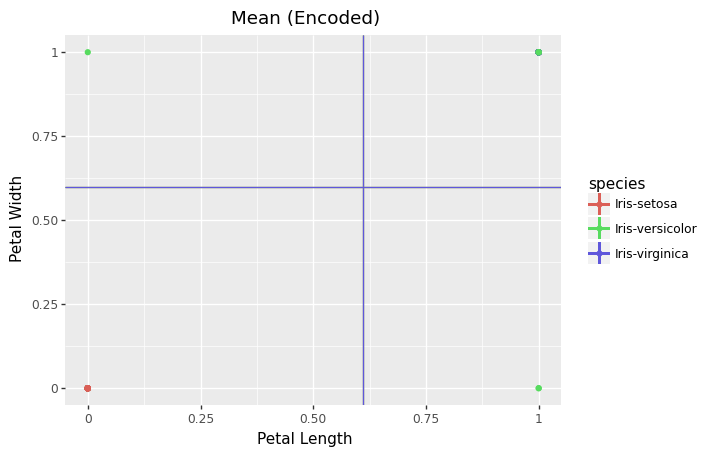

<ggplot: (8757218027237)>

In [21]:
## this type of plot will show the distribution on a chart
from plotnine import *

def show_distribution_plot(df, indicator):
  selected_option, indicator_txt = selected_indicator
  if selected_option == 0:
    return ggplot(df, aes(x='petal-length', y='petal-width', color='species')) + labs(x='Petal Length', y='Petal Width', title=selected_indicator[1] + ' (Encoded)')\
    + geom_point() + geom_vline(df, aes(xintercept=df['petal-length'].mean(), \
    color='species')) + geom_hline(df, aes(yintercept=df['petal-width'].mean(),\
                                              color='species'))
  elif selected_option == 1:
    return ggplot(df, aes(x='petal-length', y='petal-width', color='species')) + labs(x='Petal Length', y='Petal Width', title=selected_indicator[1] + ' (Encoded)')\
    + geom_point() + geom_vline(df, aes(xintercept=df['petal-length'].median(), \
    color='species')) + geom_hline(df, aes(yintercept=df['petal-width'].median(),\
                                              color='species'))
  elif selected_option == 2:
    return ggplot(df, aes(x='petal-length', y='petal-width', color='species')) + labs(x='Petal Length', y='Petal Width', title=selected_indicator[1] + ' (Encoded)')\
    + geom_point() + geom_vline(df, aes(xintercept=df['petal-length'].quantile(0.75), \
    color='species')) + geom_hline(df, aes(yintercept=df['petal-width'].quantile(0.75),\
                                              color='species'))
  elif selected_option == 3:
    return ggplot(df, aes(x='petal-length', y='petal-width', color='species')) + labs(x='Petal Length', y='Petal Width', title=selected_indicator[1] + ' (Encoded)')\
    + geom_point() + geom_vline(df, aes(xintercept=df['petal-length'].quantile(0.25), \
    color='species')) + geom_hline(df, aes(yintercept=df['petal-width'].quantile(0.25),\
                                              color='species'))
  else:
    print(':-(')  

show_distribution_plot(train, selected_indicator)